In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [5]:
df = pd.read_csv(r"C:\Users\kilar\OneDrive\Desktop\elevate lab\Iris.csv")
print(df.head())


   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [6]:
if 'Id' in df.columns:
    df = df.drop(columns=['Id'])

In [7]:
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])

X = df.drop(columns=['Species']).values
y = df['Species'].values


In [8]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [12]:
k_values = [1, 3, 5, 7, 9, 11]
accuracies = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"K={k}, Accuracy={acc:.4f}")

K=1, Accuracy=0.9333
K=3, Accuracy=0.9111
K=5, Accuracy=0.9111
K=7, Accuracy=0.9333
K=9, Accuracy=0.9556
K=11, Accuracy=0.9556


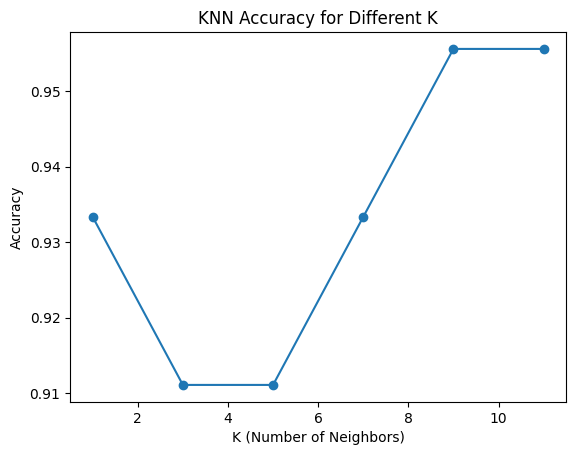

In [13]:
plt.plot(k_values, accuracies, marker='o')
plt.xlabel("K (Number of Neighbors)")
plt.ylabel("Accuracy")
plt.title("KNN Accuracy for Different K")
plt.show()

In [14]:
best_k = k_values[np.argmax(accuracies)]
print("Best K =", best_k)

knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)
y_pred_best = knn_best.predict(X_test)

Best K = 9


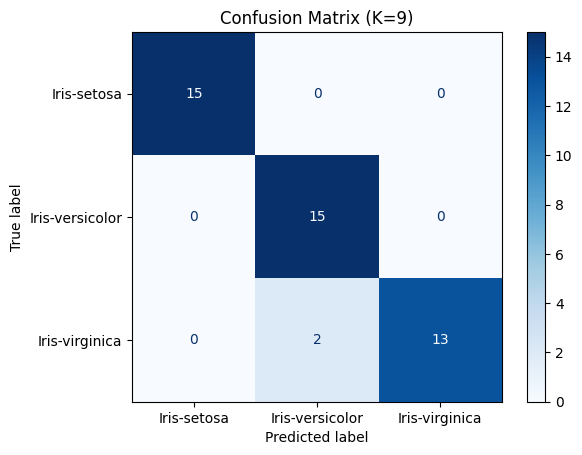

In [15]:
cm = confusion_matrix(y_test, y_pred_best)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title(f"Confusion Matrix (K={best_k})")
plt.show()

In [16]:
X2 = X[:, :2]
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.3, random_state=42, stratify=y)

knn_2d = KNeighborsClassifier(n_neighbors=best_k)
knn_2d.fit(X2_train, y2_train)


,n_neighbors,9
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None
